In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [90]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [91]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [29]:
cur = con.cursor()

select_stmt = "SELECT s.division, s.district, COUNT(*) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE(s.division, s.district, tim.month) " \
                "ORDER BY s.division"
cur.execute(select_stmt)
record = cur.fetchall()

In [30]:
record

[('BARISAL', None, 6045),
 ('BARISAL', 'BARGUNA', 684),
 ('BARISAL', 'BARISAL', 2303),
 ('BARISAL', 'PIROJPUR', 839),
 ('BARISAL', 'BHOLA', 816),
 ('BARISAL', 'PATUAKHALI', 932),
 ('BARISAL', None, 6045),
 ('BARISAL', 'JHALOKATI', 471),
 ('BARISAL', 'PATUAKHALI', 932),
 ('BARISAL', 'PIROJPUR', 839),
 ('BARISAL', 'BARGUNA', 684),
 ('BARISAL', 'BARISAL', 2303),
 ('BARISAL', 'BHOLA', 816),
 ('BARISAL', 'JHALOKATI', 471),
 ('CHITTAGONG', 'BANDARBAN', 820),
 ('CHITTAGONG', 'LAKSHMIPUR', 596),
 ('CHITTAGONG', 'KHAGRACHHARI', 919),
 ('CHITTAGONG', 'FENI', 710),
 ('CHITTAGONG', 'FENI', 710),
 ('CHITTAGONG', 'LAKSHMIPUR', 596),
 ('CHITTAGONG', None, 15808),
 ('CHITTAGONG', None, 15808),
 ('CHITTAGONG', 'RANGAMATI', 1196),
 ('CHITTAGONG', 'CHANDPUR', 875),
 ('CHITTAGONG', 'COMILLA', 1816),
 ('CHITTAGONG', 'BANDARBAN', 820),
 ('CHITTAGONG', 'CHANDPUR', 875),
 ('CHITTAGONG', 'KHAGRACHHARI', 919),
 ('CHITTAGONG', 'BRAHMANBARIA', 1093),
 ('CHITTAGONG', "COX'S BAZAR", 923),
 ('CHITTAGONG', 'CHITTAGON

In [34]:
record_load = pd.DataFrame(list(record), columns=['divison', 'district', 'sales'])

In [35]:
record_load

,divison,district,sales
0,BARISAL,None,6045
1,BARISAL,BARGUNA,684
2,BARISAL,BARISAL,2303
3,BARISAL,PIROJPUR,839
4,BARISAL,BHOLA,816
...,...,...,...
267,None,CHITTAGONG,5866
268,None,BARISAL,2303
269,None,MANIKGANJ,798
270,None,GAZIPUR,603


In [54]:
select_stmt2 = "SELECT s.division, COUNT(*) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY s.division " \
                "ORDER BY s.division"
cur.execute(select_stmt2)
record_n = cur.fetchall()

In [55]:
df = pd.DataFrame(list(record_n), columns=['divison', 'sales'])

In [56]:
df

,divison,sales
0,BARISAL,6045
1,CHITTAGONG,15808
2,DHAKA,32536
3,KHULNA,9006
4,RAJSHAHI,9781
5,RANGPUR,6878
6,SYLHET,4377


In [39]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\eSRDLab\New folder\env\Scripts\python.exe -m pip install --upgrade pip' command.


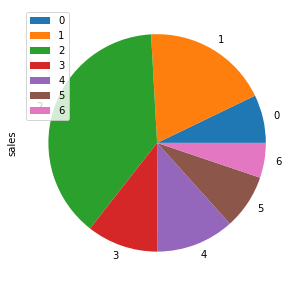

In [57]:
plot = df.plot.pie(x='division', y='sales', figsize=(5, 5))

In [64]:
df.dtypes

divison     object
sales      float64
dtype: object

In [62]:
df['sales'] = df['sales'].astype('float64')

In [65]:
df = df.set_index(['divison'])

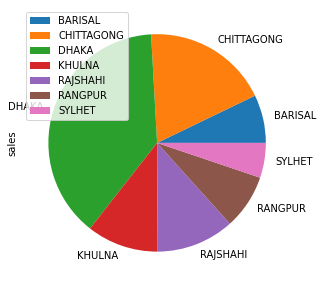

In [66]:
plot = df.plot.pie(x='division', y='sales', figsize=(5, 5))

In [67]:
df

,sales
divison,
BARISAL,6045.0
CHITTAGONG,15808.0
DHAKA,32536.0
KHULNA,9006.0
RAJSHAHI,9781.0
RANGPUR,6878.0
SYLHET,4377.0


# Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [78]:
# CUBE
cur = con.cursor()
q1 = "SELECT s.division, s.district, tim.year, tim.month, COUNT(t.total_price) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY CUBE(s.division, s.district, tim.year, tim.month) " \
                "ORDER BY s.division"
cur.execute(q1)
record_n = cur.fetchall()

In [79]:
record_n

[('BARISAL', 'JHALOKATI', 2018, None, 777),
 ('BARISAL', 'BARGUNA', 2019, 7, 91),
 ('BARISAL', 'PIROJPUR', 2014, 5, 123),
 ('BARISAL', 'PATUAKHALI', 2018, 3, 116),
 ('BARISAL', 'PATUAKHALI', 2016, 5, 161),
 ('BARISAL', 'BHOLA', 2016, 1, 110),
 ('BARISAL', 'PIROJPUR', None, 3, 833),
 ('BARISAL', 'BARGUNA', 2019, 3, 96),
 ('BARISAL', 'BARISAL', 2020, 9, 334),
 ('BARISAL', 'BARGUNA', 2015, 1, 93),
 ('BARISAL', 'PIROJPUR', 2016, 7, 127),
 ('BARISAL', 'PIROJPUR', 2014, 3, 106),
 ('BARISAL', 'PIROJPUR', 2014, 10, 101),
 ('BARISAL', None, 2019, 5, 872),
 ('BARISAL', 'BARISAL', 2016, 2, 328),
 ('BARISAL', 'JHALOKATI', 2014, 5, 65),
 ('BARISAL', 'BARGUNA', None, 3, 681),
 ('BARISAL', 'BHOLA', 2018, 8, 136),
 ('BARISAL', 'BARGUNA', None, 5, 737),
 ('BARISAL', 'BHOLA', 2020, 5, 93),
 ('BARISAL', 'BARGUNA', None, 9, 647),
 ('BARISAL', 'BARGUNA', 2016, 11, 94),
 ('BARISAL', 'BARISAL', 2014, 6, 340),
 ('BARISAL', 'BARISAL', None, 2, 2110),
 ('BARISAL', 'PIROJPUR', 2017, 8, 143),
 ('BARISAL', 'BARISA

In [80]:
df_q1 = pd.DataFrame(list(record_n), columns=['divison', 'district', 'year', 'month','total_sales_price'])

In [81]:
df_q1

,divison,district,year,month,total_sales_price
0,BARISAL,JHALOKATI,2018.0,NaN,777
1,BARISAL,BARGUNA,2019.0,7.0,91
2,BARISAL,PIROJPUR,2014.0,5.0,123
3,BARISAL,PATUAKHALI,2018.0,3.0,116
4,BARISAL,PATUAKHALI,2016.0,5.0,161
...,...,...,...,...,...
14411,None,MAGURA,2019.0,NaN,808
14412,None,MUNSHIGANJ,2018.0,NaN,1151
14413,None,NARSINGDI,2018.0,NaN,1204
14414,None,MAULVIBAZAR,2014.0,NaN,1275


In [82]:
# ROLLUP
cur = con.cursor()
q1 = "SELECT s.division, s.district, tim.year, tim.month, COUNT(t.total_price) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY ROLLUP(s.division, s.district, tim.year, tim.month) " \
                "ORDER BY s.division"
cur.execute(q1)
record_n = cur.fetchall()

In [83]:
df_q1 = pd.DataFrame(list(record_n), columns=['divison', 'district', 'year', 'month','total_sales_price'])

In [84]:
df_q1

,divison,district,year,month,total_sales_price
0,BARISAL,PATUAKHALI,2015.0,10.0,137
1,BARISAL,BARGUNA,2019.0,12.0,96
2,BARISAL,JHALOKATI,2015.0,3.0,62
3,BARISAL,BHOLA,2019.0,10.0,118
4,BARISAL,BARISAL,2014.0,6.0,340
...,...,...,...,...,...
6019,SYLHET,HABIGANJ,2019.0,4.0,143
6020,SYLHET,SYLHET,2016.0,11.0,211
6021,SYLHET,SUNAMGANJ,2019.0,1.0,202
6022,SYLHET,MAULVIBAZAR,2016.0,1.0,117


In [94]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [ ]:
con = PostgresConnection().getConnection()

In [93]:
# SLICE
cur = con.cursor()
q1 = "SELECT s.division, s.district, tim.year, tim.month, COUNT(t.total_price) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY ROLLDOWN(s.division, s.district, tim.year, tim.month) " \
                "ORDER BY s.division"
cur.execute(q1)
record_n = cur.fetchall()

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block
